<a href="https://colab.research.google.com/github/djbradyAtOpticalSciencesArizona/computationalImaging/blob/master/rays/codeApertureImaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Coded Aperture Imaging
###David Brady
### University of Arizona

Section 4.2 of **Computational Imaging**

### Python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


### Quadratic residues

In [51]:
def qres(p):
  #function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  #
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr


### Example Code patterns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

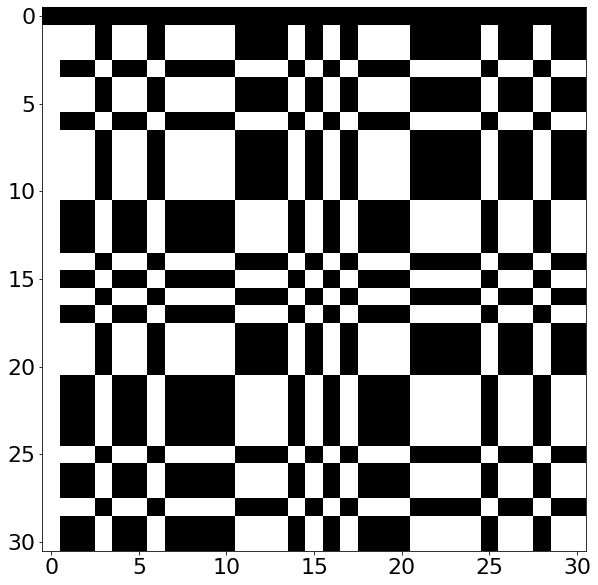

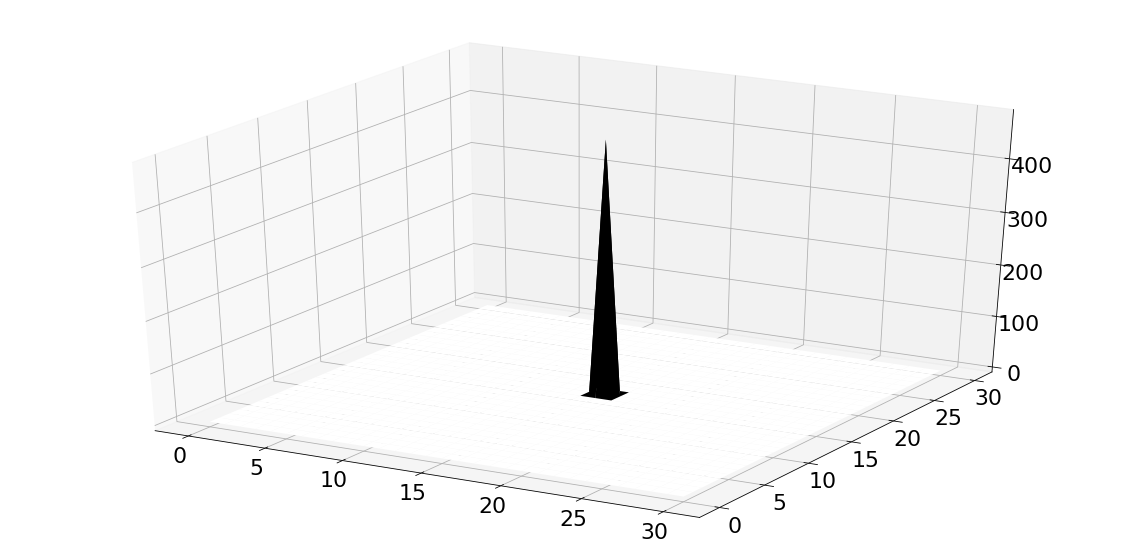

In [105]:

p=31
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');
#plt.subplot(1,2,1);
plt.imshow(t,cmap='gray');
#plt.title('Base aperture pattern')
#plt.subplot(1,2,2);
#plt.imshow(tt, cmap='gray');
#plt.title('Tiled aperture pattern')
plt.savefig('muraCodedAperture31.pdf')
files.download('muraCodedAperture31.pdf')
fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))


surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
#plt.title('Cross Corelation with Decoding Pattern')

plt.savefig('muraCodedApertureCorrelation.pdf')
files.download('muraCodedApertureCorrelation.pdf')



## Measuring and reconstructing images

In [62]:
# load the mnist dataset of characters
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


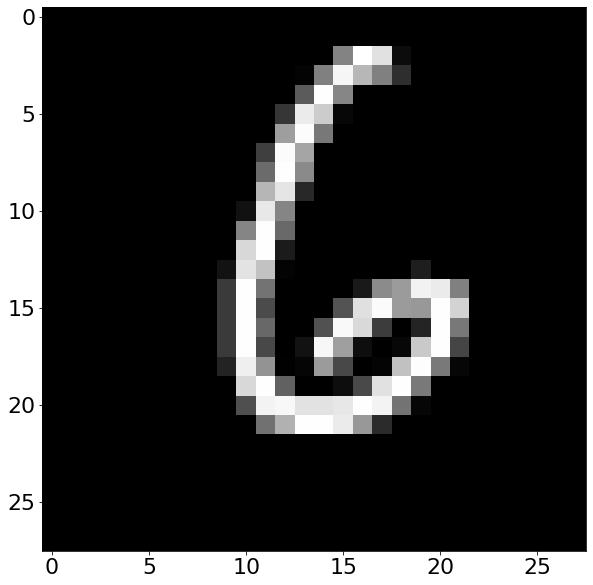

In [65]:
plt.imshow(x_train[32],cmap='gray')

### Reconstruction with no noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

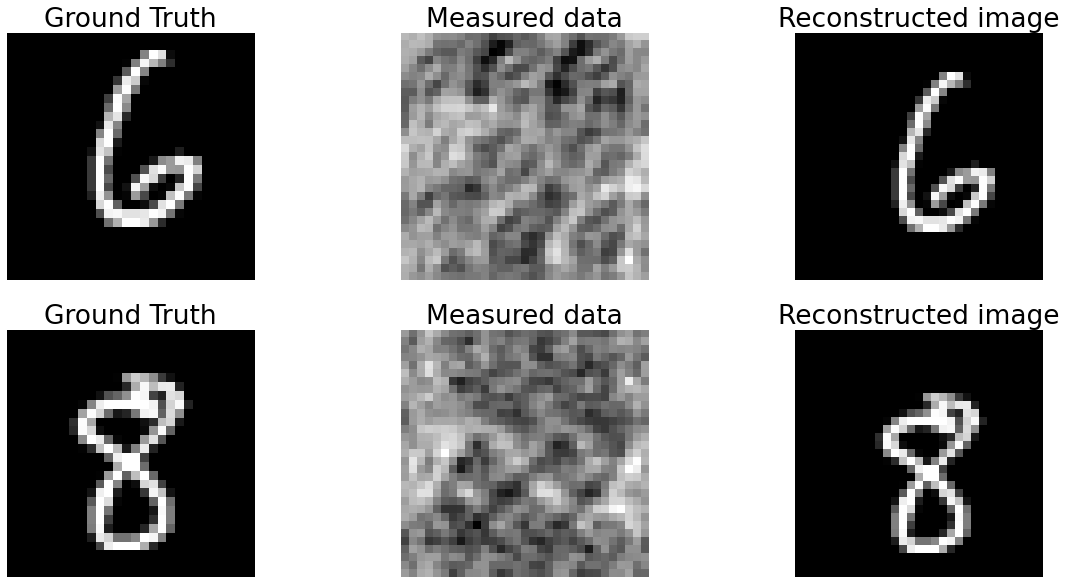

In [100]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[32];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[46];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
#photonsPerPixel=100000
#g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

plt.savefig('muraCodedApertureReconNoNoise.pdf')
files.download('muraCodedApertureReconNoNoise.pdf')

            

### Reconstruction with poisson  noise

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

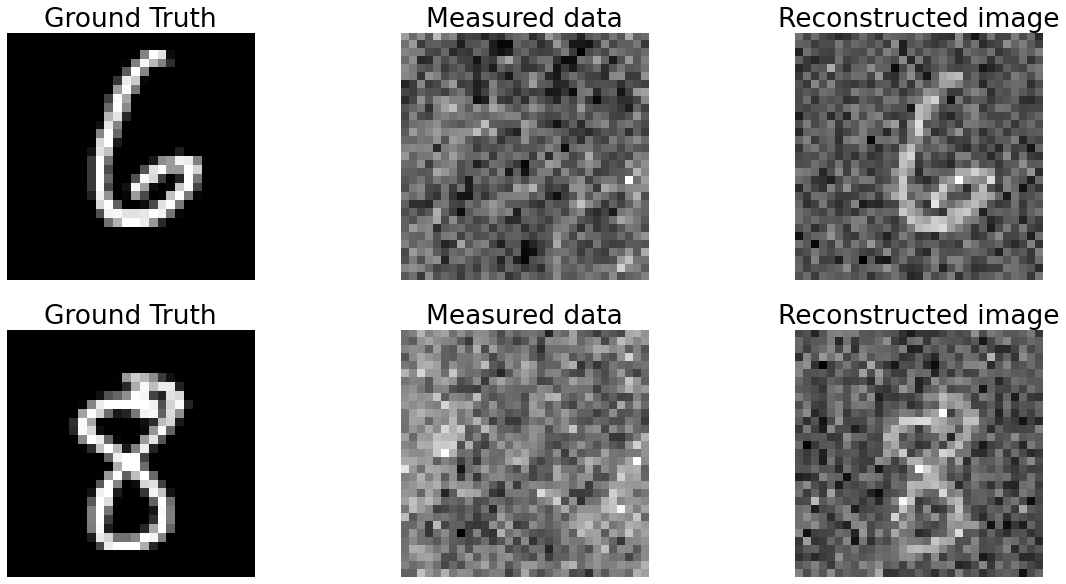

In [103]:
plt.rcParams['figure.figsize'] = [20, 10]
# we consider coded apeture imaging of images drawn from the mnist data set of hand drawn digits
noiseFactor=10;
signalNoise=0; #%1 for noise, 0 for no signal noise
imagey=x_train[32];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

imagey=x_train[46];

# Step 1 generate projected pattern
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
#The following line adds signal dependent noise
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

plt.savefig('muraCodedApertureReconShotNoise.pdf')
files.download('muraCodedApertureReconShotNoise.pdf')

            

### Coded aperture sampling function

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

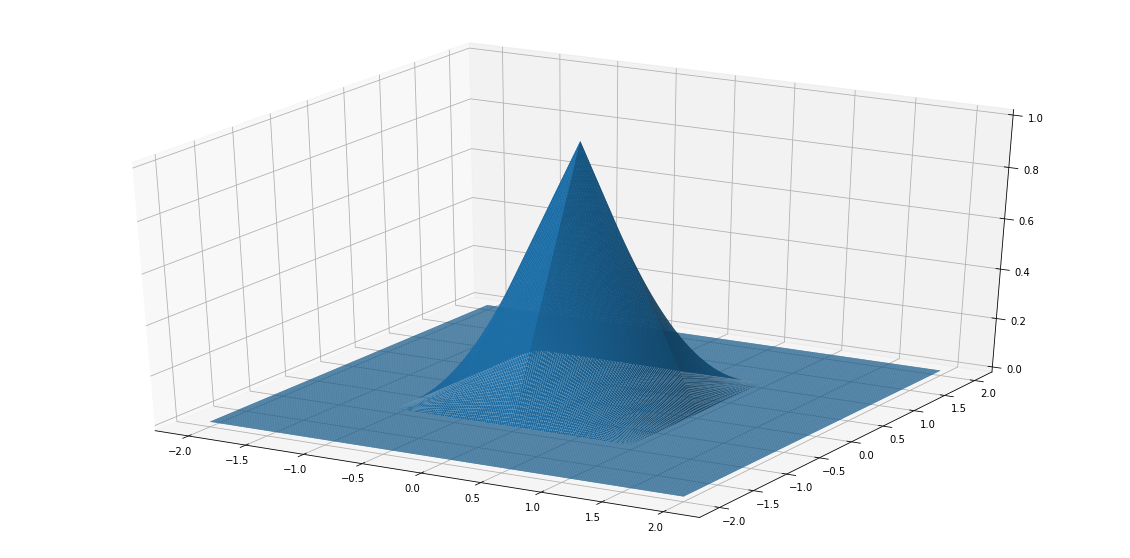

In [27]:
plt.rcParams['figure.figsize'] = [20, 10]
pixel=np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)]=1
sampFun=signal.convolve2d(pixel,pixel)
sampFun=sampFun/np.max(sampFun)
fig=plt.figure()

ax = plt.gca(projection='3d')

X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))


surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)
plt.savefig('muraCodedApertureSamplingFunction.pdf')
files.download('muraCodedApertureSamplingFunction.pdf')


In [9]:
sampFun.shape

(255, 255)